In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
#plt.style.use('ggplot')
plt.style.use('dark_background')

Ідентифікатор клієнта - унікальний ідентифікатор для кожного клієнта

Вік - Вік клієнта

Стать - стать клієнта (чоловік/жінка)

Придбаний товар - товар, придбаний клієнтом

Категорія - категорія придбаного товару

Сума покупки (USD) - сума покупки в доларах США

Місцезнаходження – місце, де була здійснена покупка

Розмір - розмір придбаного товару

Колір - колір придбаного товару

Сезон - сезон, протягом якого була здійснена покупка

Оцінка відгуку - оцінка, надана клієнтом для придбаного товару

Статус підписки - вказує, чи є у клієнта підписка (Так/Ні)

Тип доставки - тип доставки, який обирає клієнт

Discount Applied - вказує, чи застосовувалася знижка до покупки (Так/Ні)

Використаний промо-код - вказує, чи використовувався промо-код для покупки (Так/Ні)

Попередні покупки - загальна кількість транзакцій, укладених клієнтом у магазині, за винятком поточної транзакції

Спосіб оплати - спосіб оплати, якому клієнт надає перевагу

Частота покупок - частота, з якою клієнт робить покупки (наприклад, щотижня, раз на два тижні, щомісяця)

In [2]:
df = pd.read_csv('C:/Users/tuf/Desktop/shopping_trends.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Загрузіть цей файл. Перевірте розмір таблиці, наявність пропусків, тип стовпців. Перейменуйте назви стовпців: Змініть прописні букви на строчні (маленькі) та пробіл на підкреслення. 

In [4]:
df.shape

(3900, 19)

In [5]:
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [6]:
df.isna().mean()

Customer ID                 0.0
Age                         0.0
Gender                      0.0
Item Purchased              0.0
Category                    0.0
Purchase Amount (USD)       0.0
Location                    0.0
Size                        0.0
Color                       0.0
Season                      0.0
Review Rating               0.0
Subscription Status         0.0
Payment Method              0.0
Shipping Type               0.0
Discount Applied            0.0
Promo Code Used             0.0
Previous Purchases          0.0
Preferred Payment Method    0.0
Frequency of Purchases      0.0
dtype: float64

In [9]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [12]:
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Гістограма віку (age): 

Побудуйте гістограму віку клієнтів, використовуючи Seaborn. 

<Axes: xlabel='age', ylabel='Count'>

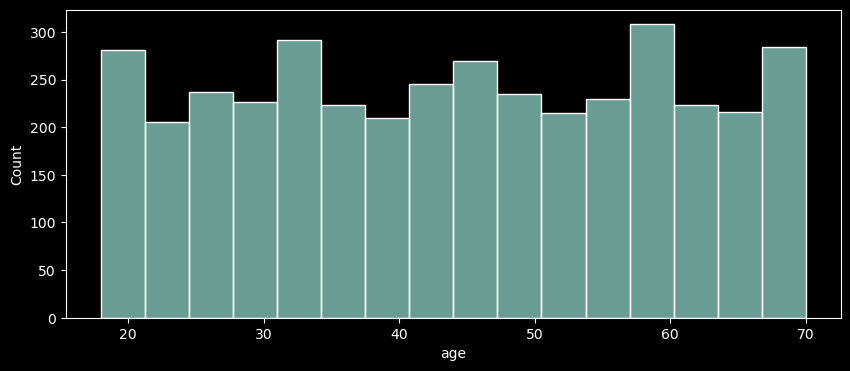

In [16]:
plt.figure(figsize= (10,4))
sns.histplot(data = df, x='age')

Порівняння розподілу покупок за статтею (item_purchased): 

Створіть стовпчасту діаграму або графік розподілу, щоб порівняти, які товари покупають клієнти найчастіше. 

In [19]:
df.item_purchased.value_counts()

item_purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

In [24]:
df.groupby('item_purchased',as_index=False).agg({'category':'count'}).sort_values('category',ascending=False)

,item_purchased,category
12,Jewelry,171
2,Blouse,171
13,Pants,171
16,Shirt,169
5,Dress,166
23,Sweater,164
10,Jacket,163
4,Coat,161
22,Sunglasses,161
1,Belt,161


<Axes: xlabel='item_purchased', ylabel='category'>

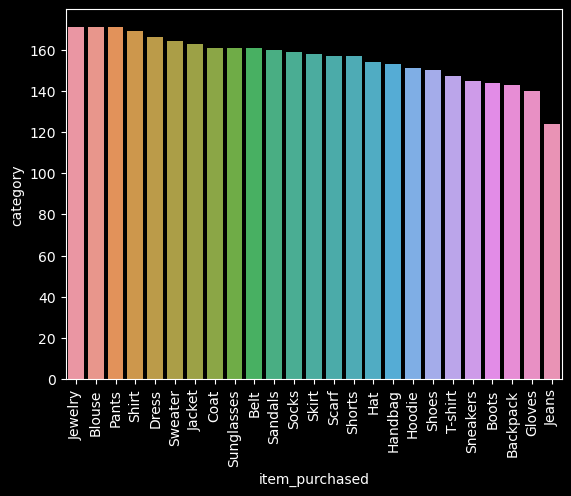

In [30]:
plt.xticks(rotation=90)
sns.barplot(data = df.groupby('item_purchased',as_index=False).agg({'category':'count'}).sort_values('category',ascending=False), x='item_purchased', y = 'category')

Залежність між віком та сумою покупок (purchase_amount): 

Використовуйте scatter plot, щоб візуалізувати залежність між віком та сумою покупок. 

<Axes: xlabel='age', ylabel='purchase_amount_(usd)'>

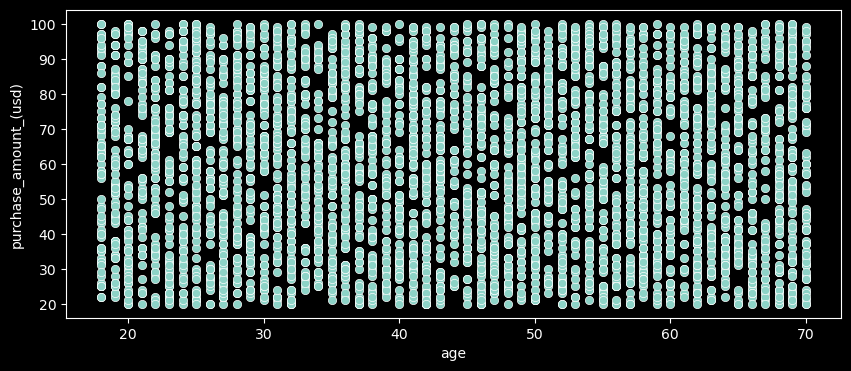

In [37]:
plt.figure(figsize= (10,4))

sns.scatterplot(x = 'age',y = 'purchase_amount_(usd)',data = df)
# Ми побудували скатерплот, і ми бачимо, що залежності між двома змінними не виникають.
# У ідеальному випадку, щоб тут ми бачили залежність, нам було б потрібно, щоб людина з більшим віком покупала ще більше покупок на більшу суму.

In [43]:
df.groupby('age').agg({'purchase_amount_(usd)':'sum'}).sort_values('purchase_amount_(usd)',ascending=False).head()
#як ми можемо побачити, що роки и загальна сума покупока не залежать одна від одного

,purchase_amount_(usd)
age,
49,5552
69,5484
25,5372
41,5282
54,5282


<Axes: xlabel='age', ylabel='age'>

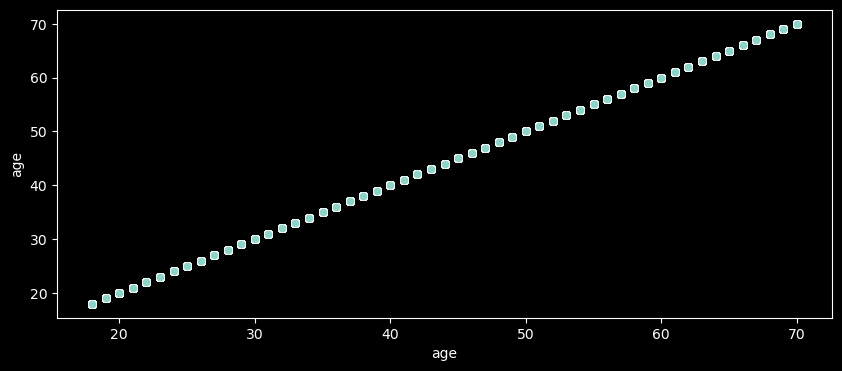

In [38]:
#Це картинка, можливо, ідеального скатерплота. Так, ми побудували залежність від тієї самої змінної. Але це все заради картинки.
plt.figure(figsize= (10,4))

sns.scatterplot(x = 'age',y = 'age',data = df)

Графік розподілу оцінок товарів (review_rating): 

Побудуйте графік розподілу оцінок товарів для оцінки якості. 

In [49]:
df.review_rating.value_counts().head()
#як ми можемо побачити, то 3.4 рейтинг є самим популярним

review_rating
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
Name: count, dtype: int64

<Axes: xlabel='review_rating', ylabel='Count'>

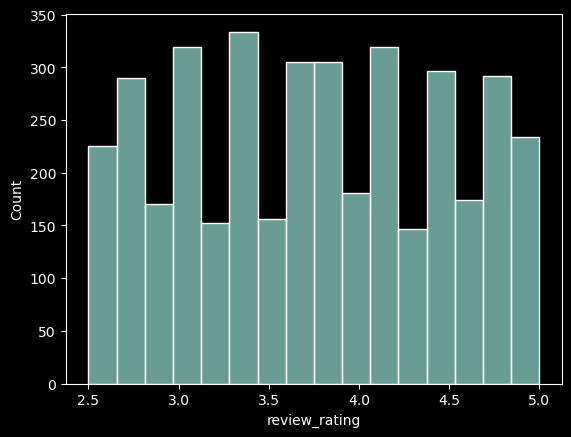

In [47]:
sns.histplot(df.review_rating)

Категоріальна діаграма для статі (gender): 

Створіть категоріальну діаграму, щоб відобразити розподіл покупок за статтею. 

оскільки Seaborn в основному орієнтована на статистичну візуалізацію та не надає безпосередньої підтримки кругових діаграм.

In [57]:
 t = df.groupby('gender',as_index=False).agg({'purchase_amount_(usd)':'sum'})

In [60]:
t

,gender,purchase_amount_(usd)
0,Female,75191
1,Male,157890


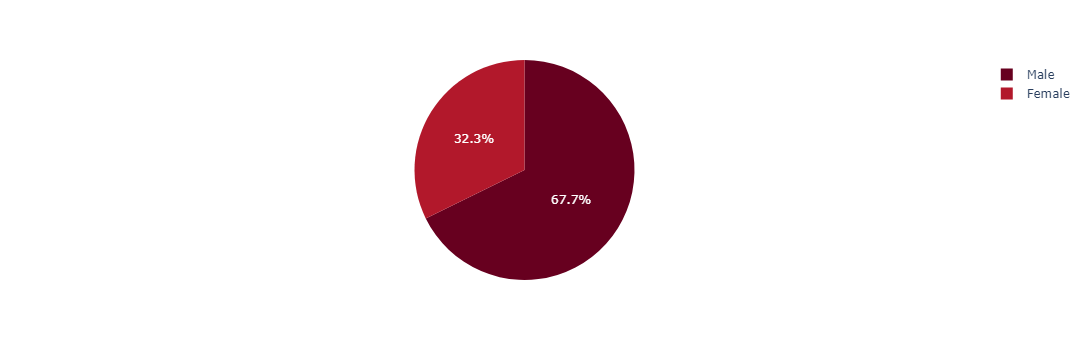

In [65]:
import plotly.express as px
dff = t
fig = px.pie(dff, values='purchase_amount_(usd)', names='gender', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
#як висновок то ми можемо побачити як за сумою покупок чоловіки викладаються на більшу суму

Залежність між рейтингом і сумою покупок (review_rating і purchase_amount): 

Вивчіть, чи існує зв'язок між рейтингом товару і сумою покупок за допомогою scatter plot. 

In [67]:
#за великим рахунком, чим більше рейтинг,тим більше попит на цей товар. Зараз це перевіремо 
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


<Axes: xlabel='review_rating', ylabel='purchase_amount_(usd)'>

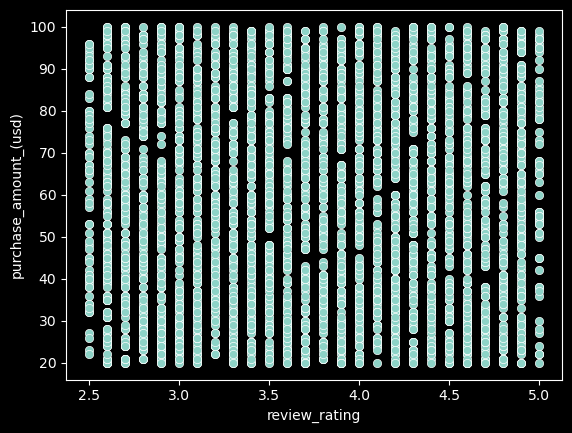

In [68]:
sns.scatterplot(data = df, x='review_rating',y='purchase_amount_(usd)')
#але як ми бачимо, то немає тут ніякої залежності. B цьому плані попит є,і на товари з поганим рейтингом, і з хоррошим.
# ми немаємо тут ніякої залежності

Сезонність покупок (season): 

Побудуйте стовпчату діаграму, яка відображає, в який сезон клієнти роблять найбільше покупок. 

In [73]:
#Тут ми подивимося на діаграму стосовно сезону та суми покупок, а також стосовно сезону і типу покупок
df.groupby('season').agg({'purchase_amount_(usd)':'sum'}).sort_values('purchase_amount_(usd)').style.background_gradient(cmap='autumn_r')
# На цій таблиці ми можемо побачити, що весна - це найприбутковіший сезон. 
# Можна висунути цілком логічну гіпотезу, що весною та зимою люди купують більше одягу, подарунків і т.д.

,purchase_amount_(usd)
season,
Summer,55777
Winter,58607
Spring,58679
Fall,60018


In [84]:
df.groupby(['season','category'])\
  .agg({'gender':'count'})\
  .sort_values(['season','gender'],ascending=[False,False]).style.background_gradient(cmap='autumn_r')
#в даному випадку ми бачимо що одяг завжди домінує.Потім аксусуари і т.д. На одяг витрати зимою значно більше ніч в інші сезони

Графік розподілу розмірів одягу (size): 

Створіть графік розподілу розмірів одягу, щоб визначити популярність різних розмірів. 

In [95]:
df['size'].value_counts().to_frame()

,count
size,
M,1755
L,1053
S,663
XL,429


<Axes: xlabel='size', ylabel='count'>

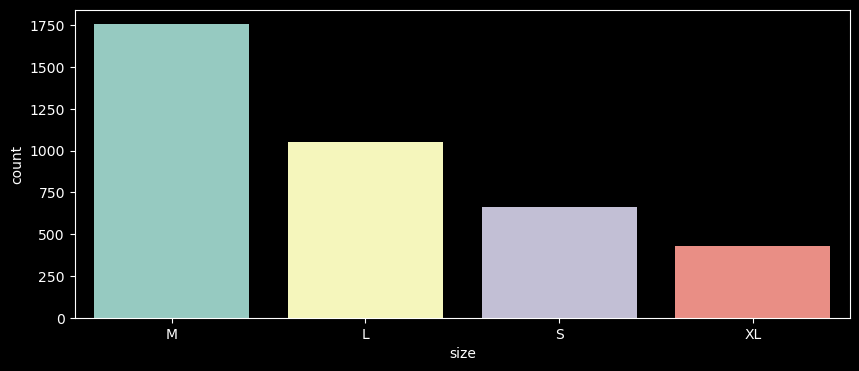

In [103]:
plt.figure(figsize= (10,4))

sns.barplot(data = df['size'].value_counts().to_frame().reset_index(), x='size',y='count')

Кількість покупок відносно типу оплати (payment_method): 

Порівняйте, скільки покупок робиться за різними методами оплати за допомогою стовпчатої діаграми. 

In [114]:
df.groupby('payment_method')\
  .agg({'purchase_amount_(usd)':'count'})\
  .sort_values('purchase_amount_(usd)',ascending=False).style.background_gradient(cmap='autumn_r')

,purchase_amount_(usd)
payment_method,
Credit Card,696
Venmo,653
Cash,648
PayPal,638
Debit Card,633
Bank Transfer,632


<Axes: xlabel='payment_method', ylabel='purchase_amount_(usd)'>

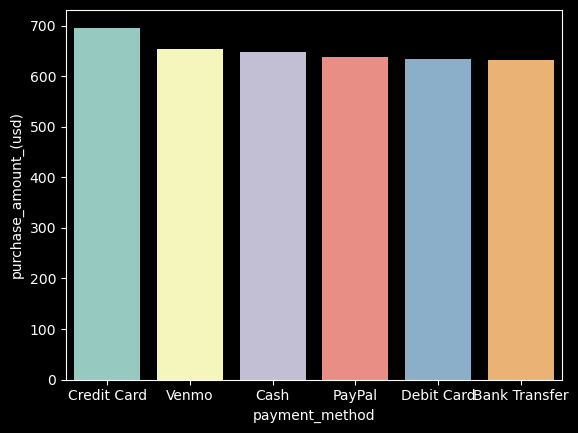

In [118]:
#plt.figure(figsize= (10,4))


sns.barplot(df.groupby('payment_method',as_index=False)\
  .agg({'purchase_amount_(usd)':'count'})\
  .sort_values('purchase_amount_(usd)',ascending=False),x='payment_method',y='purchase_amount_(usd)')

Залежність між кількістю попередніх покупок (previous_purchases) і сумою поточної покупки (purchase_amount): 
Створіть scatter plot для визначення, чи існує зв'язок між кількістю попередніх покупок та сумою поточної покупки. 

<Axes: xlabel='previous_purchases', ylabel='purchase_amount_(usd)'>

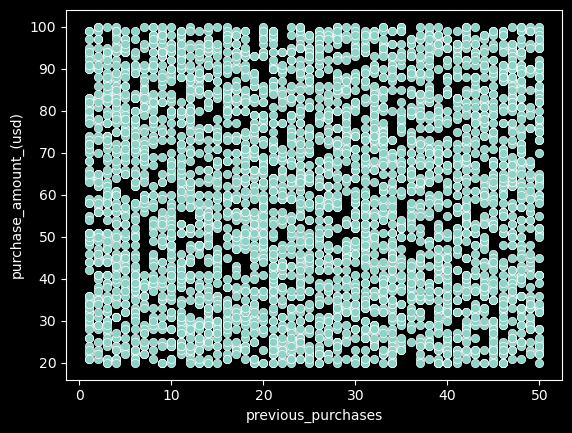

In [120]:
#як ми можемо побачити, залежності тут ніякої немає
sns.scatterplot(data = df,x='previous_purchases',y='purchase_amount_(usd)')

In [121]:
from mpl_toolkits.mplot3d import Axes3D

Побудуйте графік поверхні (3D surface plot) для візуалізації залежності між трьома числовими змінними з використанням бібліотеки Seaborn. 

Налаштуйте відображення графіка, включаючи назву графіку, підписи осей і інші необхідні параметри для кращого розуміння візуалізації. 

Додайте кольорову легенду. 
 

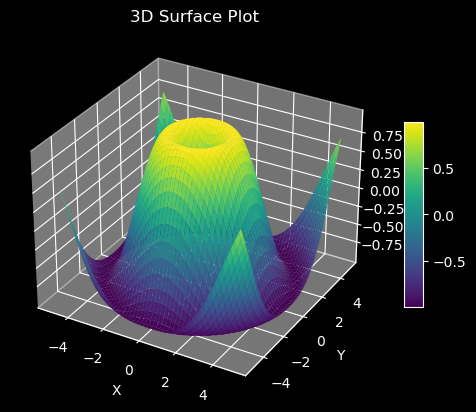

In [134]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Побудова 3D поверхні
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z, cmap='viridis')

ax.set_title('3D Surface Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

# Відображення графіка
plt.show()
#В цьому прикладі ми використали  numpy для генерації даних та mpl_toolkits.mplot3d для створення 3D графіка. 







Побудуйте графік теплової поверхні для візуалізації залежності між двома або більше числовими змінними на основі матриці даних, використовуючи бібліотеку Seaborn. 

Опис завдання: 

Згенеруйте дані, які будуть представлені у вигляді матриці. Ця матриця може містить значення залежності між двома або більше числовими змінними. 

Використовуючи бібліотеку Seaborn, побудуйте графік теплової поверхні (heatmap), де кольори відображають значення відповідних елементів матриці. 

Налаштуйте відображення графіку, включаючи назву графіку, підписи осей і інші необхідні параметри для кращого розуміння візуалізації.

In [135]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)


In [136]:
matrix_data = np.sin(np.outer(x, y))


In [137]:
print(matrix_data[:5, :5])


[[-0.13235175 -0.59542275 -0.90981673 -0.99702954 -0.83528416]
 [-0.59542275 -0.90553508 -0.99839353 -0.85171973 -0.5007033 ]
 [-0.90981673 -0.99839353 -0.85702167 -0.51826172 -0.06013641]
 [-0.99702954 -0.85171973 -0.51826172 -0.07031768  0.3931598 ]
 [-0.83528416 -0.5007033  -0.06013641  0.3931598   0.76323419]]


In [138]:
df = pd.DataFrame(matrix_data, index=x, columns=y)

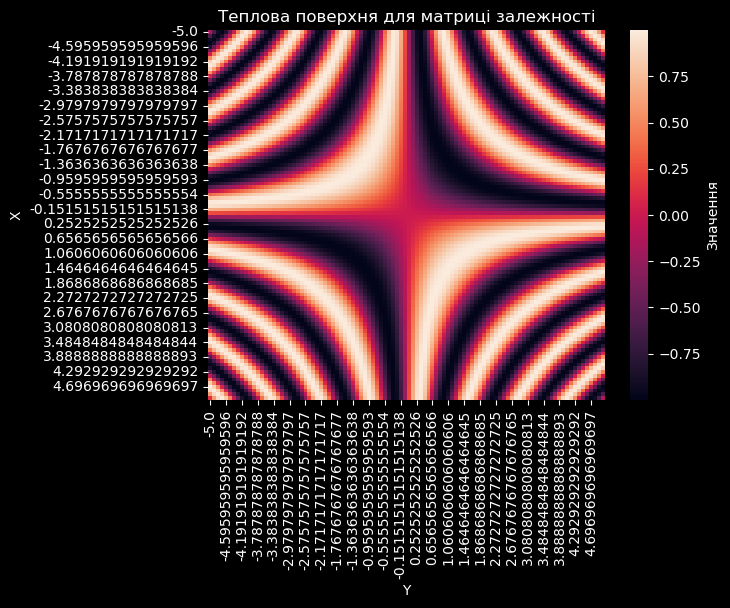

In [139]:
sns.heatmap(df, annot=False, cbar_kws={'label': 'Значення'})
plt.title('Теплова поверхня для матриці залежності')
plt.xlabel('Y')
plt.ylabel('X')

# Виведення графіка
plt.show()